# Data preparation

### Packages used

Θέλει κανα 10λεπτο να φορτώσει τα πακέτα

In [ ]:
install.packages('mlr')
library (mlr)
install.packages('psych')
library (psych)
install.packages('GPArotation')
library (GPArotation)
install.packages('FactoMineR')
library (FactoMineR)
install.packages('factoextra')
library (factoextra)
install.packages('rpart.plot')
library(rpart.plot)
install.packages("e1071")
library(ggplot2)
install.packages('neuralnet')
library(neuralnet)
install.packages('kernlab')
library(gridExtra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘fastmatch’, ‘ParamHelpers’, ‘BBmisc’, ‘checkmate’, ‘parallelMap’, ‘XML’


Loading required package: ParamHelpers

Warning message: 'mlr' is in 'maintenance-only' mode since July 2019.
Future development will only happen in 'mlr3'
(<https://mlr3.mlr-org.com>). Due to the focus on 'mlr3' there might be
uncaught bugs meanwhile in {mlr} - please consider switching.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘mnormt’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘later’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘estimability’, ‘numDe

## The Dataset

In [ ]:
wine = read.csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep=';', stringsAsFactors = FALSE, header = TRUE)
head(wine)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


In [ ]:
# Διάσταση του Dataset
dim(wine)

[1] 1599   12

## Data preparation

Transforming the target variable. \\
3-4 -> bad \\
5-6 -> average \\
7-8 -> good

In [ ]:
#Transforming Quality from an Integer to a Factor
#wine$quality <- factor(wine$quality, ordered = T)

#Creating a new Factored Variable called 'Rating'

wine$rating <- ifelse(wine$quality < 5, 'bad', ifelse(
  wine$quality < 7, 'average', 'good'))

#wine$rating <- ordered(wine$rating,
#                       levels = c('bad', 'average', 'good'))

In [ ]:
wine[,'quality'] = NULL
names(wine)[12]<-"quality"
#wine$quality <- as.character(wine$quality)

In [ ]:
table1 = as.data.frame((table(wine$quality)))
table1

Var1,Freq
<fct>,<int>
average,1319
bad,63
good,217


In [ ]:
#png("quality_table.png", height = 30*nrow(table1), width = 80*ncol(table1))
#grid.table(table1)
#dev.off()

In [ ]:
#wine$quality <- as.integer(wine$quality)
head(wine)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,average
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,average
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,average
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,average
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,average
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,average


In [ ]:
#library(gridExtra)
#png("wine_head.png", height = 30*nrow(head(wine)), width = 80*ncol(head(wine)))
#grid.table(head(wine))
#dev.off()

In [ ]:
library(gridExtra)

Splitting the sample for train(80%) and test(20%). \\


In [ ]:
quality = wine['quality']
# Train Test Split 80/20
set.seed(1234)
ind <- sample(2, nrow(wine), replace=TRUE, prob=c(0.8, 0.2))
wine_train <- wine[ind==1,]
wine_test <- wine[ind==2,]

In [ ]:
#Isolate target variable
target_train = wine_train['quality']
target_test = wine_test['quality']
#head(target_train)

In [ ]:
#Remove target variable from data
wine_train[,'quality'] = NULL
wine_test[,'quality'] = NULL
#head(wine_train)

In [ ]:
# Raw data for classification
wine_train_raw = wine_train
wine_test_raw = wine_test
target_train_raw = target_train
target_test_raw = target_test

In [ ]:
dim(wine_train)

[1] 1282   11

## Analysis

In [ ]:
print(describe(wine_train))

                     vars    n  mean    sd median trimmed   mad  min    max
fixed.acidity           1 1282  8.31  1.73   7.90    8.15  1.41 4.60  15.60
volatile.acidity        2 1282  0.53  0.18   0.52    0.52  0.18 0.12   1.58
citric.acid             3 1282  0.27  0.19   0.26    0.26  0.24 0.00   1.00
residual.sugar          4 1282  2.54  1.44   2.20    2.26  0.44 0.90  15.50
chlorides               5 1282  0.09  0.05   0.08    0.08  0.01 0.01   0.61
free.sulfur.dioxide     6 1282 15.92 10.60  14.00   14.59 10.38 1.00  72.00
total.sulfur.dioxide    7 1282 46.12 31.87  38.00   41.84 28.17 6.00 278.00
density                 8 1282  1.00  0.00   1.00    1.00  0.00 0.99   1.00
pH                      9 1282  3.31  0.16   3.31    3.31  0.15 2.74   4.01
sulphates              10 1282  0.66  0.17   0.62    0.64  0.12 0.33   2.00
alcohol                11 1282 10.44  1.07  10.20   10.33  1.04 8.40  14.00
                      range skew kurtosis   se
fixed.acidity         11.00 0.90     0.81

In [ ]:
des = describe(wine_train)
des[,1:6]

,vars,n,mean,sd,median,trimmed
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
fixed.acidity,1,1282,8.3058502,1.728067902,7.90000,8.14688109
volatile.acidity,2,1282,0.5254875,0.179216833,0.52000,0.51650097
citric.acid,3,1282,0.2710920,0.194205423,0.26000,0.26153996
residual.sugar,4,1282,2.5422777,1.440084553,2.20000,2.25618908
chlorides,5,1282,0.0875663,0.047901203,0.07900,0.08025244
free.sulfur.dioxide,6,1282,15.9227769,10.601608840,14.00000,14.58820663
total.sulfur.dioxide,7,1282,46.1244150,31.873265893,38.00000,41.84356725
density,8,1282,0.9967263,0.001912929,0.99672,0.99672011
pH,9,1282,3.3112402,0.155130647,3.31000,3.30848928


In [ ]:
des[,7:12]

,mad,min,max,range,skew,kurtosis
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
fixed.acidity,1.408470000,4.60000,15.60000,11.00000,0.90112927,0.80974158
volatile.acidity,0.181618500,0.12000,1.58000,1.46000,0.65519042,1.31911787
citric.acid,0.237216000,0.00000,1.00000,1.00000,0.32321538,-0.76404838
residual.sugar,0.444780000,0.90000,15.50000,14.60000,4.65667955,29.68401466
chlorides,0.014826000,0.01200,0.61100,0.59900,5.73798777,42.76182310
free.sulfur.dioxide,10.378200000,1.00000,72.00000,71.00000,1.29288752,2.22982427
total.sulfur.dioxide,28.169400000,6.00000,278.00000,272.00000,1.34309433,2.64551917
density,0.001660512,0.99007,1.00369,0.01362,0.04386827,0.88702073
pH,0.148260000,2.74000,4.01000,1.27000,0.26626404,0.96122056


In [ ]:
#png("describe1.png", height = 30*nrow(des[,1:6]), width = 115*ncol(des[,1:6]))
#grid.table(des[,1:6])
#dev.off()

#png("describe2.png", height = 30*nrow(des[,7:12]), width = 100*ncol(des[,7:12]))
#grid.table(des[,7:12])
#dev.off()

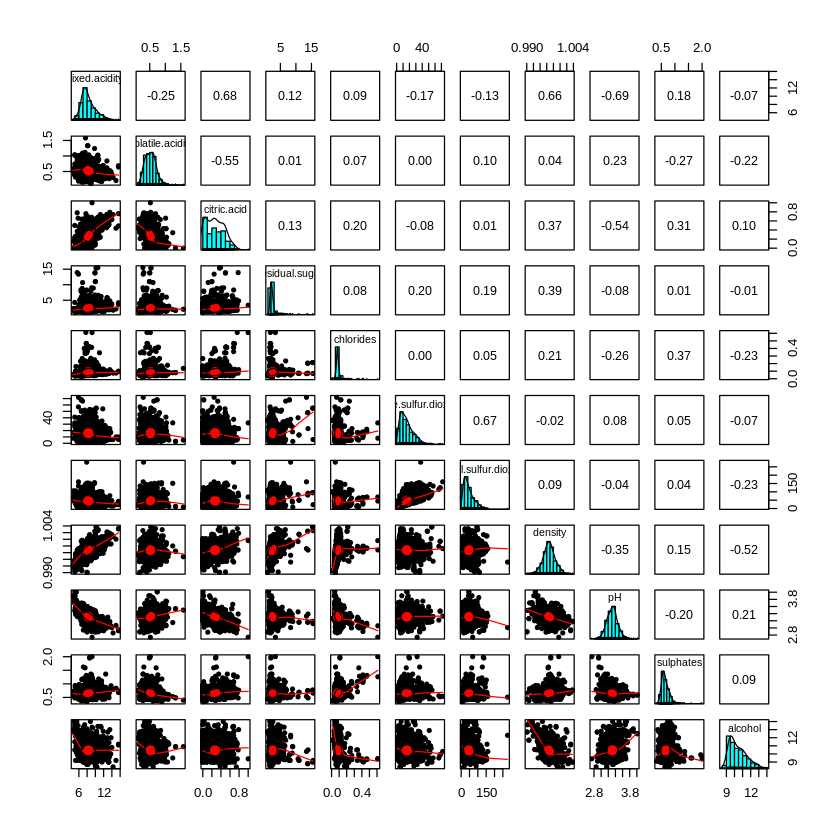

In [ ]:
pairs.panels(wine_train)

Διαγώνια ιστόγραμμα καθε μεταβλητής και δεξιά correlation matrix \\
*Οι μεταβλητές απο δεξιά προς αριστερά και από πάνω προς τα κάτω με την σειρά που είναι στο δείγμα. Fixed.acidity , volatile.acidity κτλ.

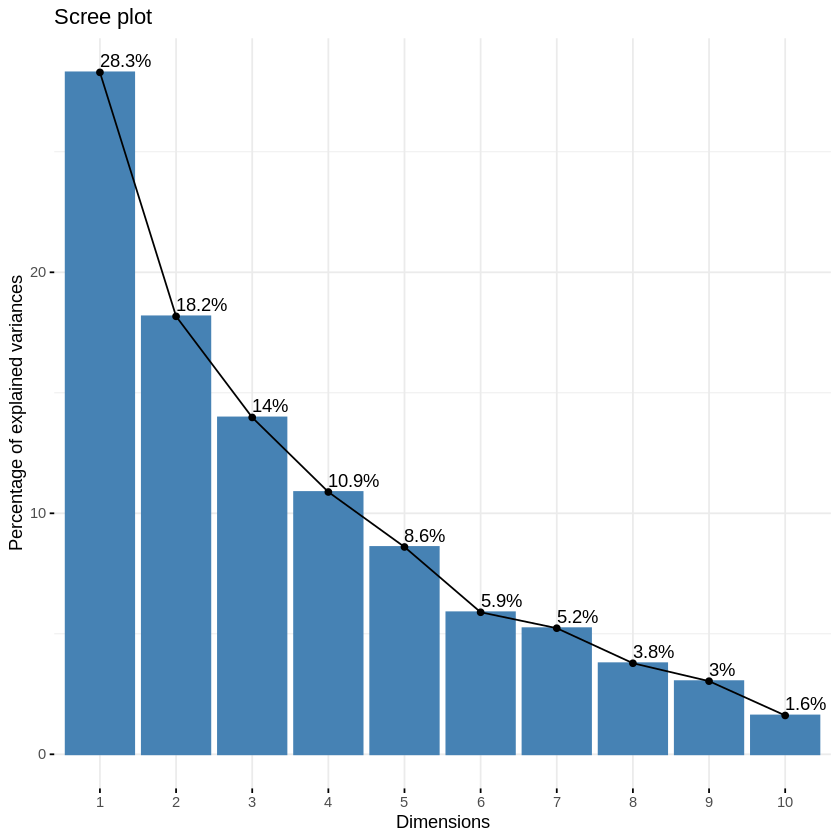

In [ ]:
myPCA = PCA(wine_train, graph = FALSE)
fviz_screeplot(myPCA, addlabels = TRUE)

# Factor Analysis

Parallel analysis suggests that the number of factors =  5  and the number of components =  4 


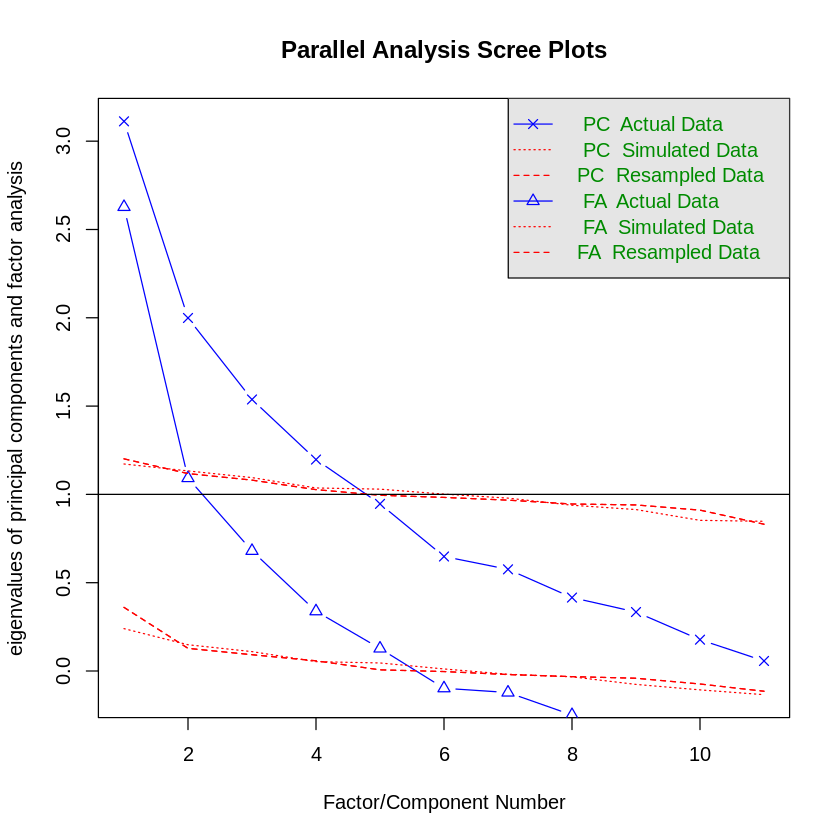

In [ ]:
fa.parallel(wine_train, n.iter = 1)

In [ ]:
#?fa

Warning message in fa.stats(r = r, f = f, phi = phi, n.obs = n.obs, np.obs = np.obs, :
“The estimated weights for the factor scores are probably incorrect.  Try a different factor score estimation method.”
Warning message in fac(r = r, nfactors = nfactors, n.obs = n.obs, rotate = rotate, :
“An ultra-Heywood case was detected.  Examine the results carefully”


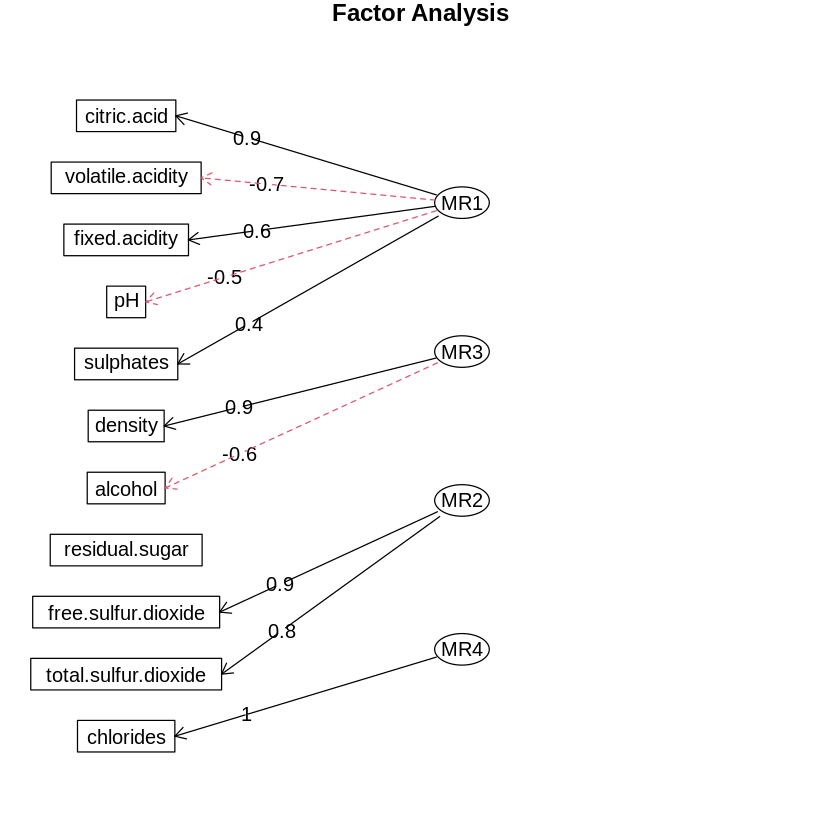

In [ ]:
myFA = fa(wine_train, nfactors = 4)
fa.diagram(myFA)

In [ ]:
# Scaling - mean 0 / sd 1
#wine_train_scaled = scale(wine_train)
#head(wine_train_scaled)

# Transforming each variable to categorical (3 categories)

In [ ]:
# n= number of clusters (3 or 5 or 7)
n=3
i=2

*Να φτιάξω λούπα

In [ ]:
# Compute k-means with n
set.seed(123)
fixed_acidity_clust = kmeans(wine_train['fixed.acidity'], n, nstart = 25)
wine_train[,'fixed.acidity']= NULL
# Add the cluster for each instance
wine_train<- cbind(wine_train, fixed.acidity = fixed_acidity_clust$cluster)
# Change cluster for IRT
wine_train$fixed.acidity <- wine_train$fixed.acidity - i

In [ ]:
citric_acid_clust = kmeans(wine_train['citric.acid'], n, nstart = 25)
wine_train['citric.acid']=NULL
wine_train<- cbind(wine_train, citric.acid = citric_acid_clust$cluster)
# Change cluster for IRT
wine_train$citric.acid <- wine_train$citric.acid - i

In [ ]:
volatile_acid_clust = kmeans(wine_train['volatile.acidity'], n, nstart = 25)
wine_train['volatile.acidity']=NULL
wine_train<- cbind(wine_train, volatile.acidity = volatile_acid_clust$cluster)
# Change cluster for IRT
wine_train$volatile.acidity <- wine_train$volatile.acidity - i

In [ ]:
resid_sugar_clust = kmeans(wine_train['residual.sugar'], n, nstart = 25)
wine_train['residual.sugar']=NULL
wine_train<- cbind(wine_train, residual.sugar = resid_sugar_clust$cluster)
# Change cluster for IRT
wine_train$residual.sugar <- wine_train$residual.sugar - i

In [ ]:
chlorides_clust = kmeans(wine_train['chlorides'], n, nstart = 25)
wine_train['chlorides']=NULL
wine_train<- cbind(wine_train, chlorides = chlorides_clust$cluster)
# Change cluster for IRT
wine_train$chlorides <- wine_train$chlorides - i

In [ ]:
free_clust = kmeans(wine_train['free.sulfur.dioxide'], n, nstart = 25)
wine_train['free.sulfur.dioxide']=NULL
wine_train<- cbind(wine_train, free.sulfur.dioxide = free_clust$cluster)
# Change cluster for IRT
wine_train$free.sulfur.dioxide <- wine_train$free.sulfur.dioxide - i

In [ ]:
total_clust = kmeans(wine_train['total.sulfur.dioxide'], n, nstart = 25)
wine_train['total.sulfur.dioxide']=NULL
wine_train<- cbind(wine_train, total.sulfur.dioxide = total_clust$cluster)
# Change cluster for IRT
wine_train$total.sulfur.dioxide <- wine_train$total.sulfur.dioxide - i

In [ ]:
density_clust = kmeans(wine_train['density'], n, nstart = 25)
wine_train['density']=NULL
wine_train<- cbind(wine_train, density	 = density_clust$cluster)
# Change cluster for IRT
wine_train$density <- wine_train$density - i

In [ ]:
ph_clust = kmeans(wine_train['pH'], n, nstart = 25)
wine_train['pH']=NULL
wine_train<- cbind(wine_train, pH = ph_clust$cluster)
# Change cluster for IRT
wine_train$pH <- wine_train$pH - i

In [ ]:
sulph_clust = kmeans(wine_train['sulphates'], n, nstart = 25)
wine_train['sulphates']=NULL
wine_train<- cbind(wine_train, sulphates = sulph_clust$cluster)
# Change cluster for IRT
wine_train$sulphates <- wine_train$sulphates - i

In [ ]:
alcohol_clust = kmeans(wine_train['alcohol'], n, nstart = 25)
wine_train['alcohol']=NULL
wine_train<- cbind(wine_train, alcohol = alcohol_clust$cluster)
# Change cluster for IRT
wine_train$alcohol <- wine_train$alcohol - i

In [ ]:
 wine_train_k = head(wine_train)
 wine_train_k

,fixed.acidity,citric.acid,volatile.acidity,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-1,1,-1,1,1,0,1,0,1,1,-1
2,-1,1,1,1,1,1,-1,0,-1,-1,-1
3,-1,1,1,1,1,1,-1,0,0,1,-1
4,0,-1,0,1,1,1,-1,0,-1,1,-1
6,-1,1,-1,1,1,0,-1,0,1,1,-1
7,-1,1,-1,1,1,1,-1,0,0,1,-1


In [ ]:
png("wine_train_clustered.png", height = 30*nrow(wine_train_k), width = 80*ncol(wine_train_k))
grid.table(wine_train_k)
dev.off()

png 
  2

# IRT

In [ ]:
#wine_train[,"Importance.F1.score"] = NULL

In [ ]:
Importance=wine_train

### 1ος παράγοντας

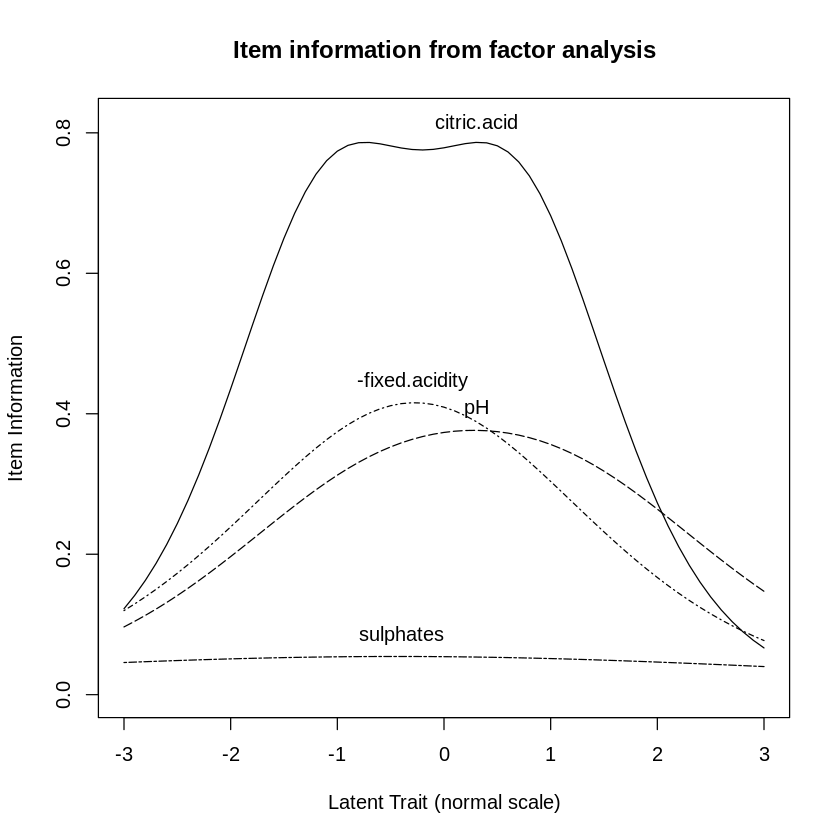

In [ ]:
Importance.F1.data = Importance[, c("citric.acid",
                                    "volatile.acidity",
                                    "fixed.acidity",
                                    "pH",
                                    "sulphates")]
Importance.F1.irt = irt.fa(Importance.F1.data)

Warning message:
“`qplot()` was deprecated in ggplot2 3.4.0.”
Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


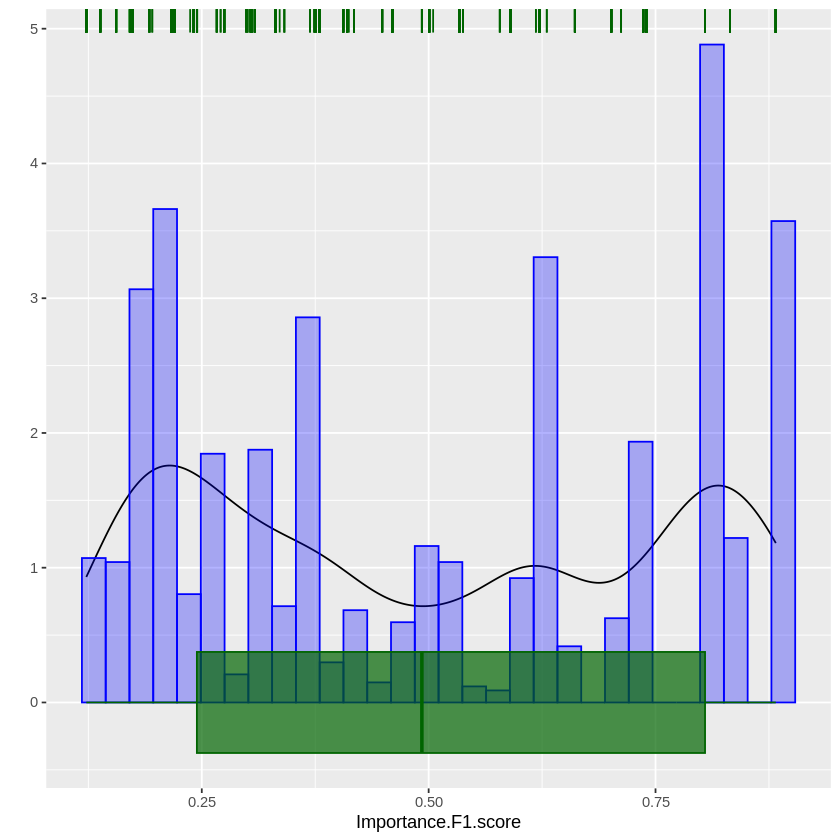

In [ ]:
# Importance Scores
scores = scoreIrt(Importance.F1.irt, items=Importance.F1.data)
# rescale score
scores.sc = scores$theta1
Importance.F1.score = pnorm(scores.sc)
# create dataframe
Importance = data.frame(Importance, Importance.F1.score)
# ploting
qplot(Importance.F1.score, data = Importance, geom = "density") +
  geom_histogram(aes(y = ..density..), colour = "blue", fill = "blue", alpha=0.3) +
  geom_boxplot(colour = "darkgreen", fill="darkgreen", alpha = 0.7) +
  geom_rug(sides = "t", colour = "darkgreen")

In [ ]:
Importance[, c("citric.acid",
               "volatile.acidity",
               "fixed.acidity",
               "pH",
              "sulphates")] = NULL
head(Importance)

,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,alcohol,Importance.F1.score
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,0,1,0,-1,0.8825672
2,1,1,1,-1,0,-1,0.6181753
3,1,1,1,-1,0,-1,0.8045877
4,1,1,1,-1,0,-1,0.2163685
6,1,1,0,-1,0,-1,0.8825672
7,1,1,1,-1,0,-1,0.8045877


### 2ος παράγοντας

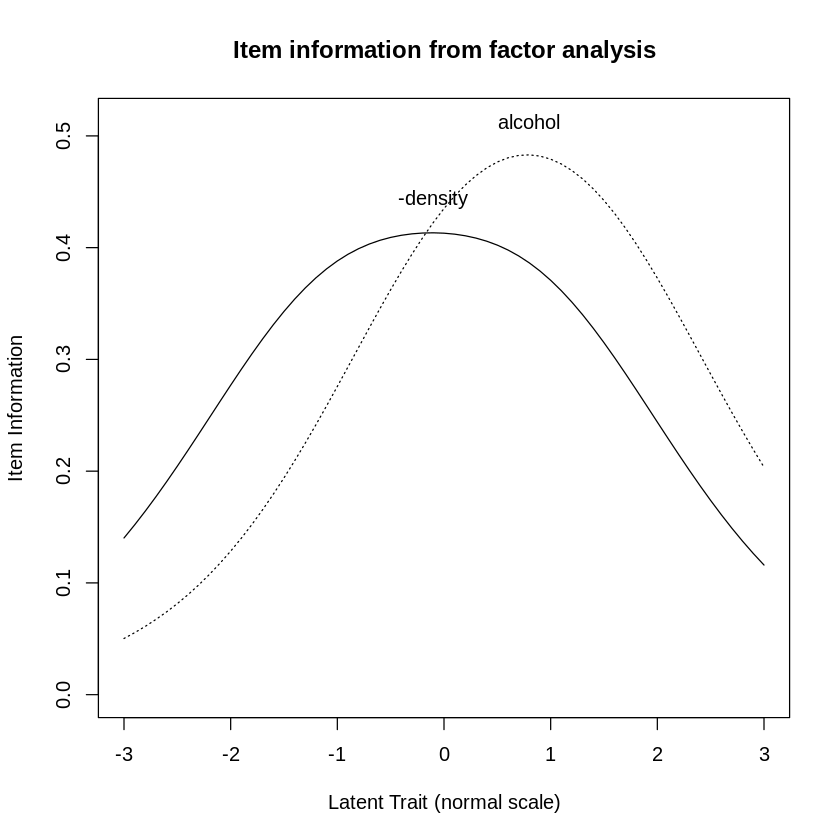

In [ ]:
Importance.F2.data = Importance[, c("density",
                                    "alcohol")]
Importance.F2.irt = irt.fa(Importance.F2.data)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


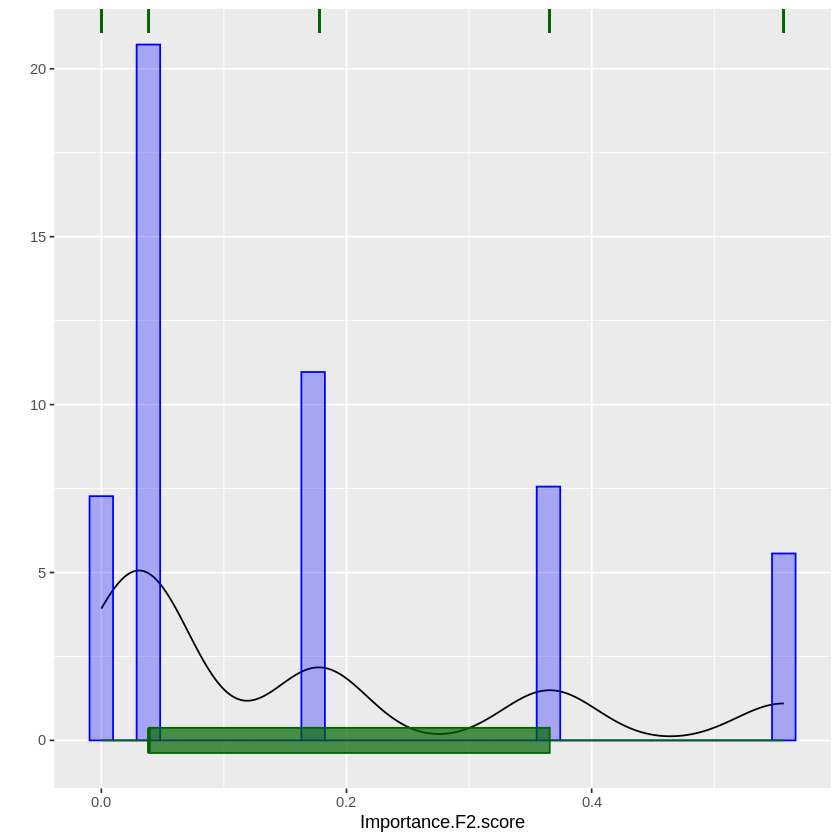

In [ ]:
scores = scoreIrt(Importance.F2.irt, items=Importance.F2.data)
### rescale score
scores.sc = scores$theta1
Importance.F2.score = pnorm(scores.sc)
Importance = data.frame(Importance, Importance.F2.score)
qplot(Importance.F2.score, data = Importance, geom = "density") +
  geom_histogram(aes(y = ..density..), colour = "blue", fill = "blue", alpha=0.3) +
  geom_boxplot(colour = "darkgreen", fill="darkgreen", alpha = 0.7) +
  geom_rug(sides = "t", colour = "darkgreen")

In [ ]:
Importance[, c("density",
               "alcohol")] = NULL
head(Importance)

,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,Importance.F1.score,Importance.F2.score
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,0,1,0.8825672,0.03877626
2,1,1,1,-1,0.6181753,0.03877626
3,1,1,1,-1,0.8045877,0.03877626
4,1,1,1,-1,0.2163685,0.03877626
6,1,1,0,-1,0.8825672,0.03877626
7,1,1,1,-1,0.8045877,0.03877626


### 3ος παράγοντας

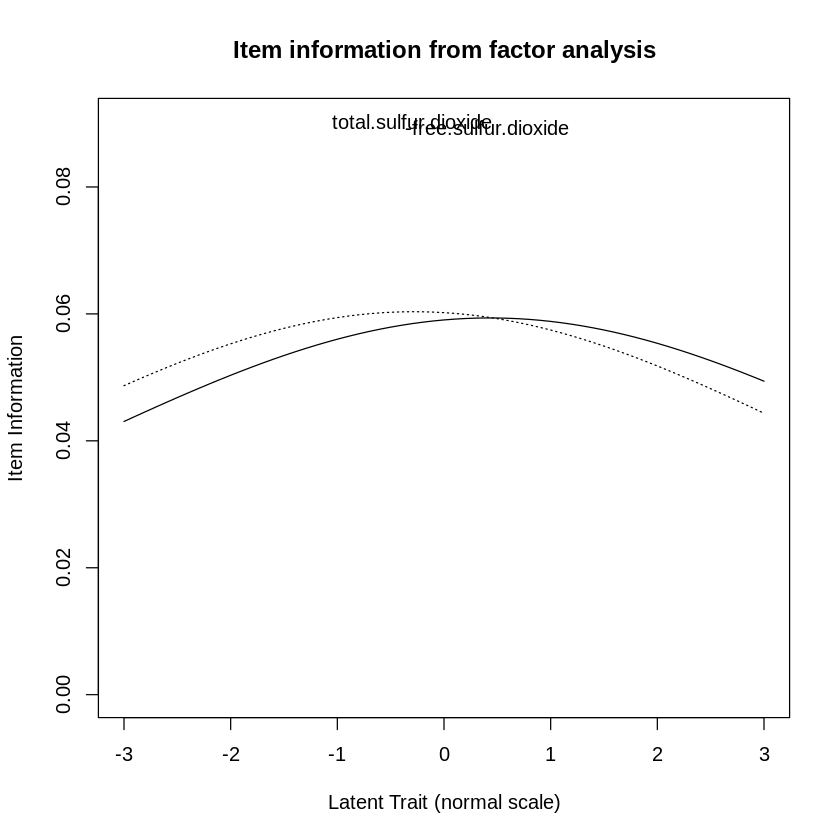

In [ ]:
Importance.F3.data = Importance[, c("free.sulfur.dioxide",
                                    "total.sulfur.dioxide")]
Importance.F3.irt = irt.fa(Importance.F3.data)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


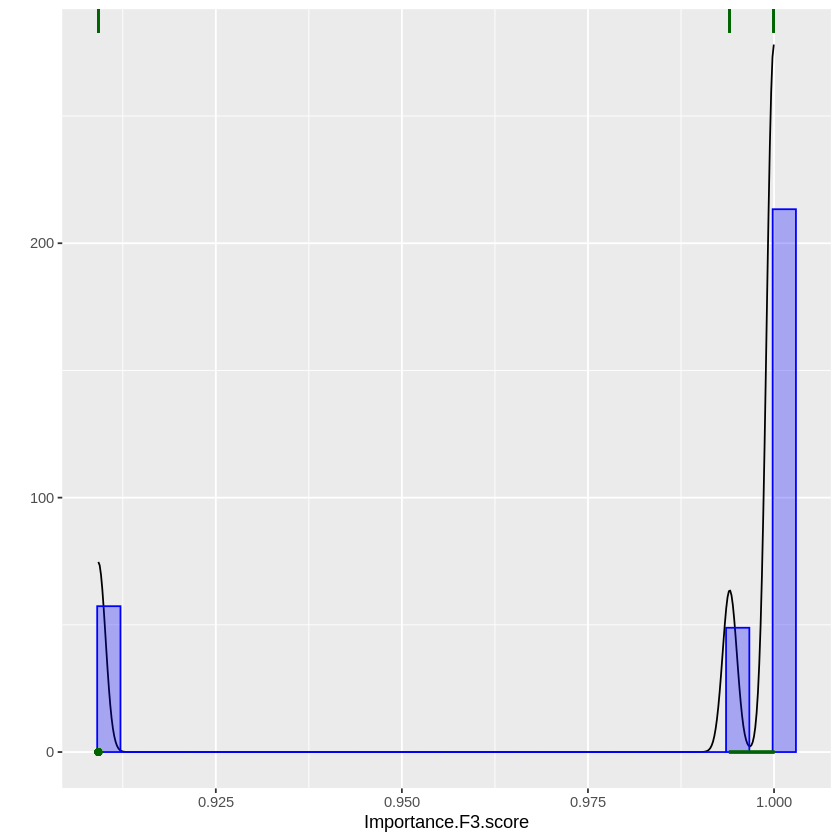

In [ ]:
scores = scoreIrt(Importance.F3.irt, items=Importance.F3.data)
### rescale score
scores.sc = scores$theta1
Importance.F3.score = pnorm(scores.sc)
Importance = data.frame(Importance, Importance.F3.score)
qplot(Importance.F3.score, data = Importance, geom = "density") +
  geom_histogram(aes(y = ..density..), colour = "blue", fill = "blue", alpha=0.3) +
  geom_boxplot(colour = "darkgreen", fill="darkgreen", alpha = 0.7) +
  geom_rug(sides = "t", colour = "darkgreen")

In [ ]:
Importance[, c("free.sulfur.dioxide",
               "total.sulfur.dioxide")] = NULL
Importance_res = head(Importance)
Importance_res

,residual.sugar,chlorides,Importance.F1.score,Importance.F2.score,Importance.F3.score
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,0.8825672,0.03877626,0.9999683
2,1,1,0.6181753,0.03877626,0.9092186
3,1,1,0.8045877,0.03877626,0.9092186
4,1,1,0.2163685,0.03877626,0.9092186
6,1,1,0.8825672,0.03877626,0.9940459
7,1,1,0.8045877,0.03877626,0.9092186


In [ ]:
#png("Importance_res.png", height = 30*nrow(Importance_res), width = 120*ncol(Importance_res))
#grid.table(Importance_res)
#dev.off()

png 
  2

# Fitting kmeans and irt in the test set

In [ ]:
dimension_test = dim(wine_test)[1]
dimension_test

[1] 317

## Fitting K-means

*Επίσης λουπα

In [ ]:
# Fixed Acidity
cent = fixed_acidity_clust$centers
for (i in 1:dimension_test) {
  distance1 = abs((cent[1])- (wine_test$fixed.acidity[i]))
  distance2 = abs((cent[2])- (wine_test$fixed.acidity[i]))
  distance3 = abs((cent[3])- (wine_test$fixed.acidity[i]))

  if (distance1 <= distance2 & distance1 <= distance3){
  clust= -1
} else if (distance2 <= distance3){
  clust= 0
} else {
  clust= 1
}
  wine_test$fixed.acidity[i] <- clust
  #wine_test$fixed.acidity[i] <- ifelse(distance1 < distance2 & distance1 < distance3, 1, ifelse(
  #distance2 < distance3, 2, 3))
}


In [ ]:
#volatile.acidity
cent = volatile_acid_clust$centers
for (i in 1:dimension_test) {
  distance1 = abs((cent[1])- (wine_test$volatile.acidity[i]))
  distance2 = abs((cent[2])- (wine_test$volatile.acidity[i]))
  distance3 = abs((cent[3])- (wine_test$volatile.acidity[i]))

  if (distance1 <= distance2 & distance1 <= distance3){
  clust= -1
} else if (distance2 <= distance3){
  clust= 0
} else {
  clust= 1
}
  wine_test$volatile.acidity[i] <- clust
}

In [ ]:
#citric.acid
cent = citric_acid_clust$centers
for (i in 1:dimension_test) {
  distance1 = abs((cent[1])- (wine_test$citric.acid[i]))
  distance2 = abs((cent[2])- (wine_test$citric.acid[i]))
  distance3 = abs((cent[3])- (wine_test$citric.acid[i]))

  if (distance1 <= distance2 & distance1 <= distance3){
  clust= -1
} else if (distance2 <= distance3){
  clust= 0
} else {
  clust= 1
}
  wine_test$citric.acid[i] <- clust
}

In [ ]:
#residual.sugar
cent = resid_sugar_clust$centers
for (i in 1:dimension_test) {
  distance1 = abs((cent[1])- (wine_test$residual.sugar[i]))
  distance2 = abs((cent[2])- (wine_test$residual.sugar[i]))
  distance3 = abs((cent[3])- (wine_test$residual.sugar[i]))

  if (distance1 <= distance2 & distance1 <= distance3){
  clust= -1
} else if (distance2 <= distance3){
  clust= 0
} else {
  clust= 1
}
  wine_test$residual.sugar[i] <- clust
}

In [ ]:
#chlorides
cent = chlorides_clust$centers
for (i in 1:dimension_test) {
  distance1 = abs((cent[1])- (wine_test$chlorides[i]))
  distance2 = abs((cent[2])- (wine_test$chlorides[i]))
  distance3 = abs((cent[3])- (wine_test$chlorides[i]))

  if (distance1 <= distance2 & distance1 <= distance3){
  clust= -1
} else if (distance2 <= distance3){
  clust= 0
} else {
  clust= 1
}
  wine_test$chlorides[i] <- clust
}

In [ ]:
#free.sulfur.dioxide
cent = free_clust$centers
for (i in 1:dimension_test) {
  distance1 = abs((cent[1])- (wine_test$free.sulfur.dioxide[i]))
  distance2 = abs((cent[2])- (wine_test$free.sulfur.dioxide[i]))
  distance3 = abs((cent[3])- (wine_test$free.sulfur.dioxide[i]))

  if (distance1 <= distance2 & distance1 <= distance3){
  clust= -1
} else if (distance2 <= distance3){
  clust= 0
} else {
  clust= 1
}
  wine_test$free.sulfur.dioxide[i] <- clust
}

In [ ]:
#total.sulfur.dioxide
cent = total_clust$centers
for (i in 1:dimension_test) {
  distance1 = abs((cent[1])- (wine_test$total.sulfur.dioxide[i]))
  distance2 = abs((cent[2])- (wine_test$total.sulfur.dioxide[i]))
  distance3 = abs((cent[3])- (wine_test$total.sulfur.dioxide[i]))

  if (distance1 <= distance2 & distance1 <= distance3){
  clust= -1
} else if (distance2 <= distance3){
  clust= 0
} else {
  clust= 1
}
  wine_test$total.sulfur.dioxide[i] <- clust
}

In [ ]:
#density
cent = density_clust$centers
for (i in 1:dimension_test) {
  distance1 = abs((cent[1])- (wine_test$density[i]))
  distance2 = abs((cent[2])- (wine_test$density[i]))
  distance3 = abs((cent[3])- (wine_test$density[i]))

  if (distance1 <= distance2 & distance1 <= distance3){
  clust= -1
} else if (distance2 <= distance3){
  clust= 0
} else {
  clust= 1
}
  wine_test$density[i] <- clust
}

In [ ]:
#pH
cent = ph_clust$centers
for (i in 1:dimension_test) {
  distance1 = abs((cent[1])- (wine_test$pH[i]))
  distance2 = abs((cent[2])- (wine_test$pH[i]))
  distance3 = abs((cent[3])- (wine_test$pH[i]))

  if (distance1 <= distance2 & distance1 <= distance3){
  clust= -1
} else if (distance2 <= distance3){
  clust= 0
} else {
  clust= 1
}
  wine_test$pH[i] <- clust
}

In [ ]:
#sulphates
cent = sulph_clust$centers
for (i in 1:dimension_test) {
  distance1 = abs((cent[1])- (wine_test$sulphates[i]))
  distance2 = abs((cent[2])- (wine_test$sulphates[i]))
  distance3 = abs((cent[3])- (wine_test$sulphates[i]))

  if (distance1 <= distance2 & distance1 <= distance3){
  clust= -1
} else if (distance2 <= distance3){
  clust= 0
} else {
  clust= 1
}
  wine_test$sulphates[i] <- clust
}

In [ ]:
#alcohol
cent = alcohol_clust$centers
for (i in 1:dimension_test) {
  distance1 = abs((cent[1])- (wine_test$alcohol[i]))
  distance2 = abs((cent[2])- (wine_test$alcohol[i]))
  distance3 = abs((cent[3])- (wine_test$alcohol[i]))

  if (distance1 <= distance2 & distance1 <= distance3){
  clust= -1
} else if (distance2 <= distance3){
  clust= 0
} else {
  clust= 1
}
  wine_test$alcohol[i] <- clust
}

In [ ]:
head(wine_test)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5,-1,-1,1,1,1,0,1,0,1,1,-1
14,-1,-1,0,1,1,0,1,0,0,0,-1
16,1,-1,0,-1,-1,-1,0,1,-1,-1,-1
26,-1,0,1,1,1,0,1,-1,0,1,-1
28,-1,0,0,1,1,0,1,0,-1,-1,-1
29,-1,1,1,1,1,1,1,0,1,1,-1


## Fitting IRT

In [ ]:
Importance_test=wine_test

### 1ος παράγοντας

In [ ]:
Importance.test.F1.data = Importance_test[, c("citric.acid",
                                    "volatile.acidity",
                                    "fixed.acidity",
                                    "pH",
                                    "sulphates")]

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


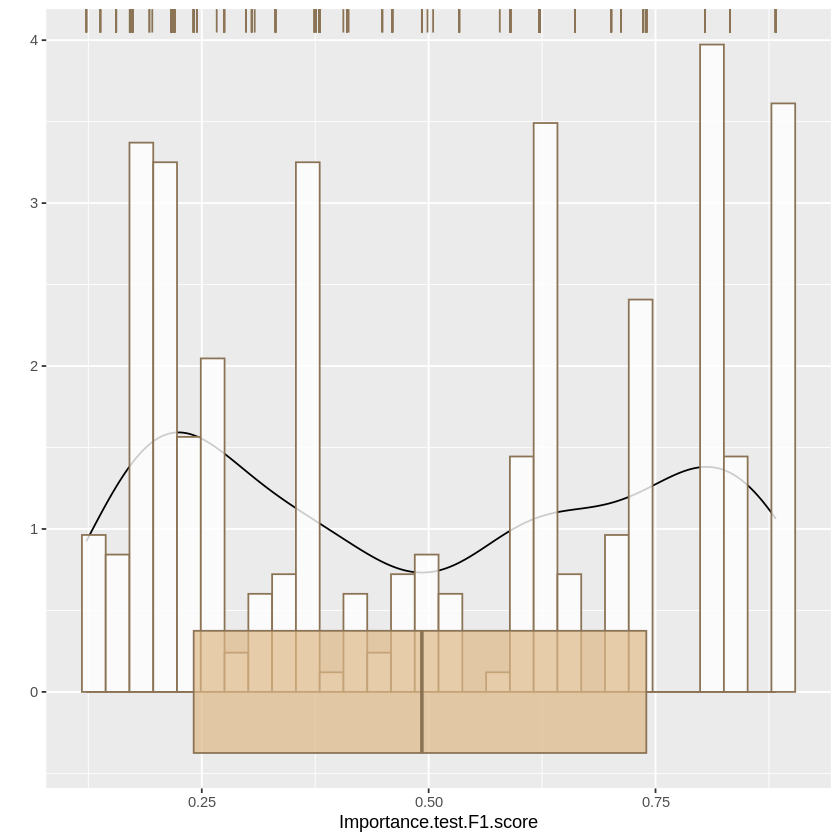

In [ ]:
scores = scoreIrt(Importance.F1.irt, items=Importance.test.F1.data)
### rescale score
scores.sc = scores$theta1
Importance.test.F1.score = pnorm(scores.sc)
Importance_test = data.frame(Importance_test, Importance.test.F1.score)
qplot(Importance.test.F1.score, data = Importance_test, geom = "density") +
  geom_histogram(aes(y = ..density..), colour = "blue", fill = "blue", alpha=0.3) +
  geom_boxplot(colour = "darkgreen", fill="darkgreen", alpha = 0.7) +
  geom_rug(sides = "t", colour = "darkgreen")

In [ ]:
Importance_test[, c("citric.acid",
               "volatile.acidity",
               "fixed.acidity",
               "pH",
              "sulphates")] = NULL
head(Importance_test)

,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,alcohol,Importance.test.F1.score
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5,1,1,0,1,0,-1,0.8825672
14,1,1,0,1,0,-1,0.5783860
16,-1,-1,-1,0,1,-1,0.2175153
26,1,1,0,1,-1,-1,0.8045877
28,1,1,0,1,0,-1,0.4059916
29,1,1,1,1,0,-1,0.8825672


### 2ος παράγοντας

In [ ]:
Importance.test.F2.data = Importance_test[, c("density",
                                    "alcohol")]

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


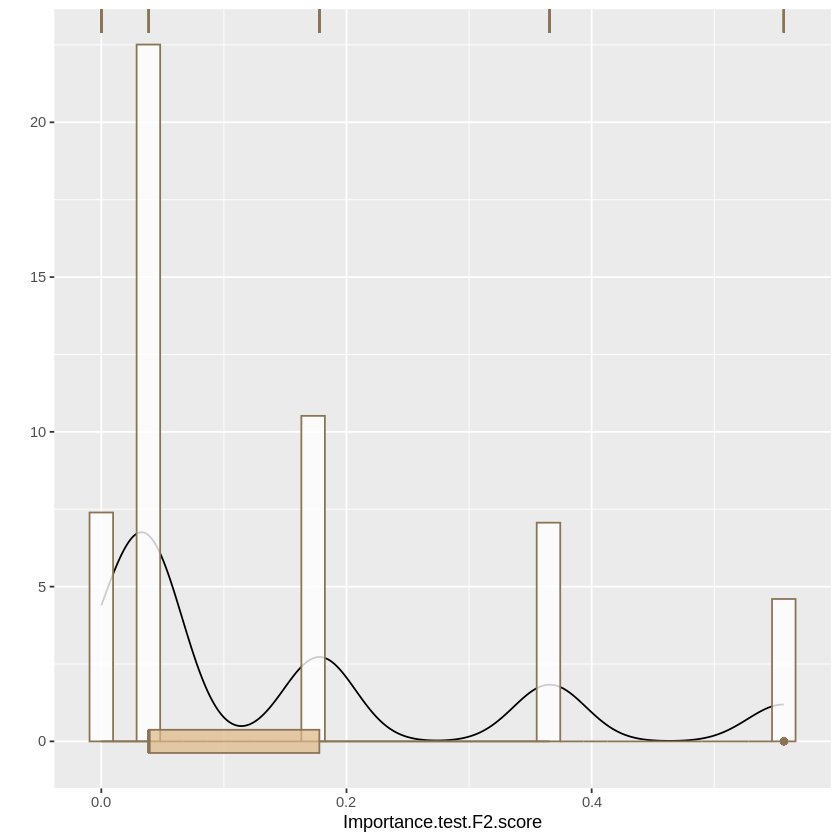

In [ ]:
scores = scoreIrt(Importance.F2.irt, items=Importance.test.F2.data)
### rescale score
scores.sc = scores$theta1
Importance.test.F2.score = pnorm(scores.sc)
Importance_test = data.frame(Importance_test, Importance.test.F2.score)
qplot(Importance.test.F2.score, data = Importance_test, geom = "density") +
  geom_histogram(aes(y = ..density..), colour = "blue", fill = "blue", alpha=0.3) +
  geom_boxplot(colour = "darkgreen", fill="darkgreen", alpha = 0.7) +
  geom_rug(sides = "t", colour = "darkgreen")

In [ ]:
Importance_test[, c("density",
               "alcohol")] = NULL
head(Importance_test)

,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,Importance.test.F1.score,Importance.test.F2.score
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5,1,1,0,1,0.8825672,0.038776259
14,1,1,0,1,0.5783860,0.038776259
16,-1,-1,-1,0,0.2175153,0.000031677
26,1,1,0,1,0.8045877,0.177882615
28,1,1,0,1,0.4059916,0.038776259
29,1,1,1,1,0.8825672,0.038776259


### 3ος παράγοντας

In [ ]:
Importance.test.F3.data = Importance_test[, c("free.sulfur.dioxide",
                                    "total.sulfur.dioxide")]

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


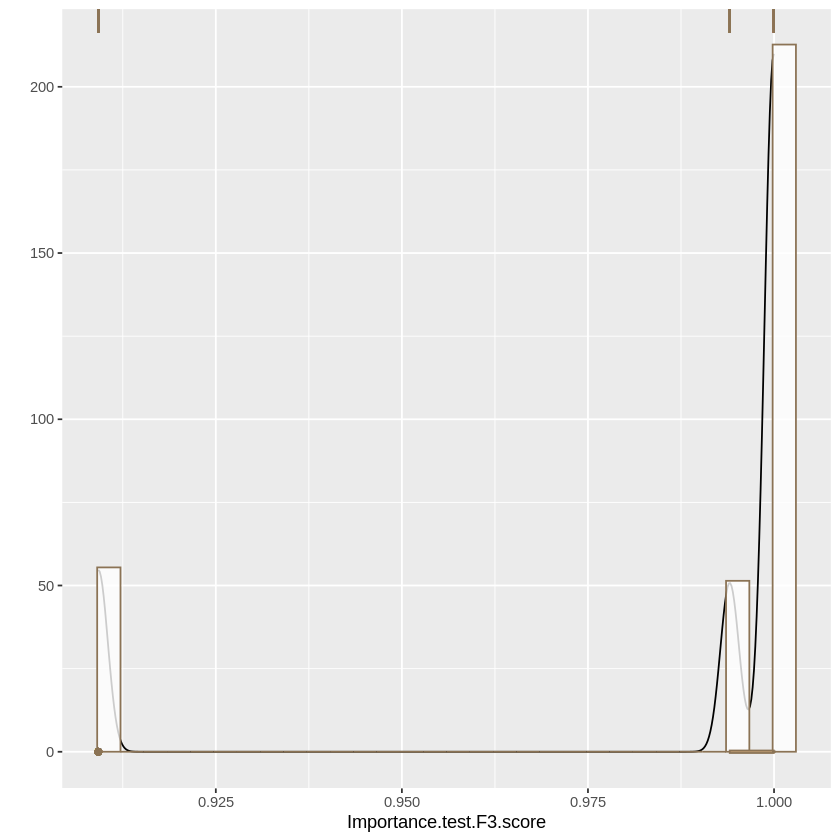

In [ ]:
scores = scoreIrt(Importance.F3.irt, items=Importance.test.F3.data)
### rescale score
scores.sc = scores$theta1
Importance.test.F3.score = pnorm(scores.sc)
Importance_test = data.frame(Importance_test, Importance.test.F3.score)
qplot(Importance.test.F3.score, data = Importance_test, geom = "density") +
  geom_histogram(aes(y = ..density..), colour = "blue", fill = "blue", alpha=0.3) +
  geom_boxplot(colour = "darkgreen", fill="darkgreen", alpha = 0.7) +
  geom_rug(sides = "t", colour = "darkgreen")

In [ ]:
Importance_test[, c("free.sulfur.dioxide",
               "total.sulfur.dioxide")] = NULL
head(Importance_test)

,residual.sugar,chlorides,Importance.test.F1.score,Importance.test.F2.score,Importance.test.F3.score
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5,1,1,0.8825672,0.038776259,0.9999683
14,1,1,0.5783860,0.038776259,0.9999683
16,-1,-1,0.2175153,0.000031677,0.9999683
26,1,1,0.8045877,0.177882615,0.9999683
28,1,1,0.4059916,0.038776259,0.9999683
29,1,1,0.8825672,0.038776259,0.9999679


# For classification

In [ ]:
#Θα κάνουμε των 2/3 των δεδομένων για εκπαίδευση του αλγόριθμου και το 1/3 για αξιολόγηση (εσωτερικη)
rdesc = makeResampleDesc(method = "Holdout", split = 2/3)

## IRT

In [ ]:
colnames(Importance)
colnames(Importance_test)

[1] "residual.sugar"      "chlorides"           "Importance.F1.score"
[4] "Importance.F2.score" "Importance.F3.score"

[1] "residual.sugar"           "chlorides"               
[3] "Importance.test.F1.score" "Importance.test.F2.score"
[5] "Importance.test.F3.score"

In [ ]:
names(Importance_test)[3]<-"Importance.F1.score"
names(Importance_test)[4]<-"Importance.F2.score"
names(Importance_test)[5]<-"Importance.F3.score"

In [ ]:
# The train set
X_irt <- cbind(Importance, quality = target_train)
head(X_irt)

,residual.sugar,chlorides,Importance.F1.score,Importance.F2.score,Importance.F3.score,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1,1,0.8825672,0.03877626,0.9999683,average
2,1,1,0.6181753,0.03877626,0.9092186,average
3,1,1,0.8045877,0.03877626,0.9092186,average
4,1,1,0.2163685,0.03877626,0.9092186,average
6,1,1,0.8825672,0.03877626,0.9940459,average
7,1,1,0.8045877,0.03877626,0.9092186,average


In [ ]:
# The classification Task
task_irt = makeClassifTask(data = X_irt, target = "quality")

In [ ]:
# The test set
X_test_irt <- cbind(Importance_test, quality = target_test)
head(X_test_irt)

,residual.sugar,chlorides,Importance.F1.score,Importance.F2.score,Importance.F3.score,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
5,1,1,0.8825672,0.038776259,0.9999683,average
14,1,1,0.5783860,0.038776259,0.9999683,average
16,-1,-1,0.2175153,0.000031677,0.9999683,average
26,1,1,0.8045877,0.177882615,0.9999683,average
28,1,1,0.4059916,0.038776259,0.9999683,average
29,1,1,0.8825672,0.038776259,0.9999679,average


## RAW

In [ ]:
# The train set
X_raw <- cbind(wine_train_raw, quality = target_train)
head(X_raw)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,average
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,average
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,average
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,average
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,average
7,7.9,0.60,0.06,1.6,0.069,15,59,0.9964,3.30,0.46,9.4,average


In [ ]:
# The classification Task
task_raw = makeClassifTask(data = X_raw, target = "quality")

In [ ]:
# The test set
X_test_raw <- cbind(wine_test_raw, quality = target_test)
head(X_test_raw)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,average
14,7.8,0.61,0.29,1.6,0.114,9,29,0.9974,3.26,1.56,9.1,average
16,8.9,0.62,0.19,3.9,0.170,51,148,0.9986,3.17,0.93,9.2,average
26,6.3,0.39,0.16,1.4,0.080,11,23,0.9955,3.34,0.56,9.3,average
28,7.9,0.43,0.21,1.6,0.106,10,37,0.9966,3.17,0.91,9.5,average
29,7.1,0.71,0.00,1.9,0.080,14,35,0.9972,3.47,0.55,9.4,average


# Decision Tree

In [ ]:
#Θα κάνουμε χρήση του αλγόριθμου μάθησης part
DT_learner = makeLearner("classif.rpart")

## With IRT

In [ ]:
#Τρέχουμε το πείραμα και εμφανίζουμε την ακρίβεια του με μετρο την ακριβεια
DT_irt_result = resample(DT_learner, task_irt, rdesc, measures = acc, model = TRUE,set.seed(1234))

Resampling: holdout

Measures:             acc       

[Resample] iter 1:    0.8481308 




Aggregated Result: acc.test.mean=0.8481308






Warning message:
“Cannot retrieve the data used to build the model (so cannot determine roundint and is.binary for the variables).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE.”


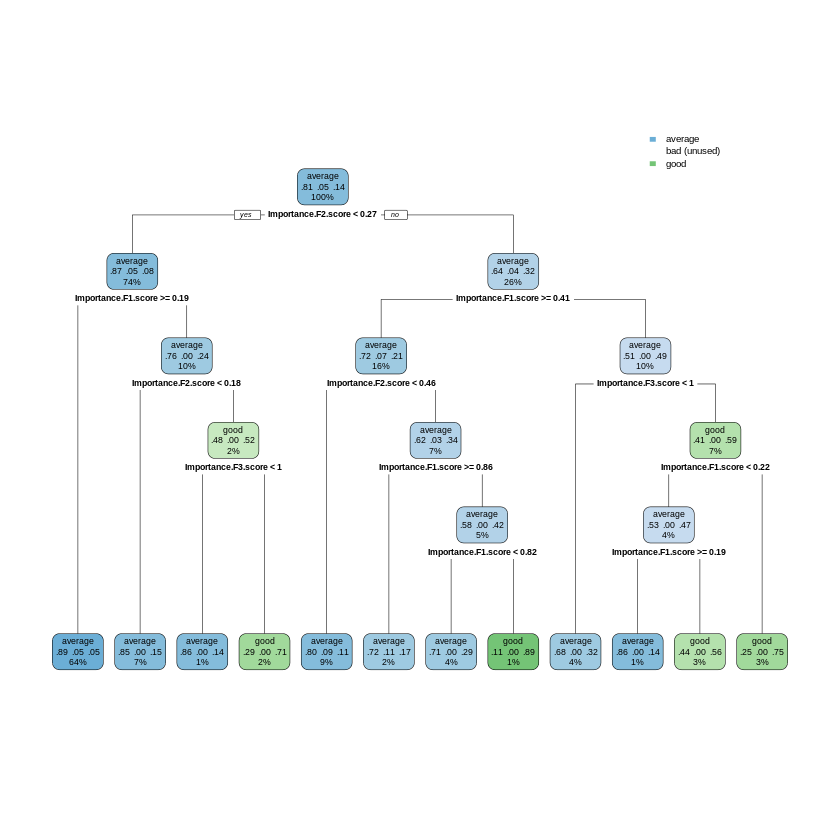

In [ ]:
#εμφανίζουμε το δέντρο απόφασης του πειράματος
rpart.plot(getLearnerModel(DT_irt_result$models[[1]]))

In [ ]:
# Εμφανίζουμε μερικές από τις προβλέψεις
#getRRPredictions(DT_irt_result)

In [ ]:
DT_test_irt = train("classif.rpart", task_irt)
print(DT_test_irt)
X_test_irt.pred = predict(DT_test_irt, newdata = X_test_irt)
X_test_irt.pred

Model for learner.id=classif.rpart; learner.class=classif.rpart
Trained on: task.id = X_irt; obs = 1282; features = 5
Hyperparameters: xval=0


Prediction: 317 observations
predict.type: response
threshold: 
time: 0.00
     truth response
5  average  average
14 average  average
16 average  average
26 average  average
28 average  average
29 average  average
... (#rows: 317, #cols: 2)

In [ ]:
DT_CM_X_test_irt = calculateConfusionMatrix(X_test_irt.pred)
DT_CM_X_test_irt$result

,average,bad,good,-err.-
average,259,0,9,9
bad,14,0,0,14
good,26,0,9,26
-err.-,40,0,9,49


In [ ]:
#pdf("DT_CM_X_test_irt$result.pdf")    # Export PDF
#grid.table(DT_CM_X_test_irt$result)
#dev.off()

png 
  2

In [ ]:
DT_res_test_irt = DT_CM_X_test_irt$result
DT_res_test_irt_acc = (317 - DT_res_test_irt[4,4]) / 317
DT_res_test_irt_acc

[1] 0.8454259

## Without IRT

In [ ]:
#Τρέχουμε το πείραμα και εμφανίζουμε την ακρίβεια του με μετρο την ακριβεια
result = resample(DT_learner, task_raw, rdesc, measures = acc, models = TRUE,set.seed(1234))

Resampling: holdout

Measures:             acc       

[Resample] iter 1:    0.8200935 




Aggregated Result: acc.test.mean=0.8200935






Warning message:
“Cannot retrieve the data used to build the model (so cannot determine roundint and is.binary for the variables).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE.”


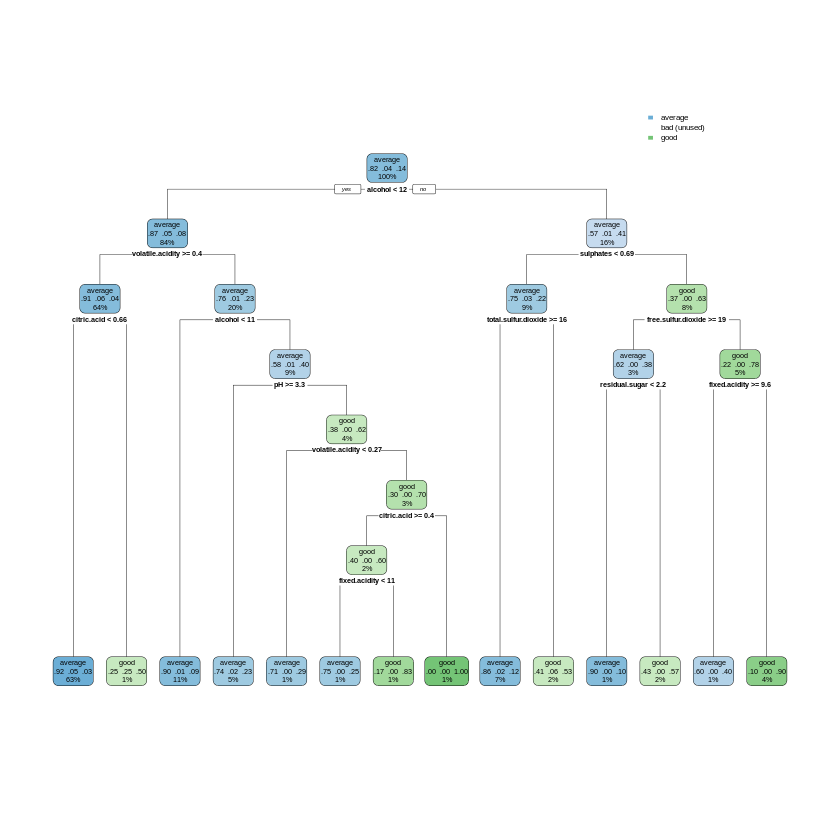

In [ ]:
#εμφανίζουμε το δέντρο απόφασης του πειράματος
rpart.plot(getLearnerModel(result$models[[1]]))

In [ ]:
DT_test_raw = train("classif.rpart", task_raw)
DT_test_raw
X_test_raw.pred = predict(DT_test_raw, newdata = X_test_raw)
X_test_raw.pred

Model for learner.id=classif.rpart; learner.class=classif.rpart
Trained on: task.id = X_raw; obs = 1282; features = 11
Hyperparameters: xval=0

Prediction: 317 observations
predict.type: response
threshold: 
time: 0.00
     truth response
5  average  average
14 average  average
16 average  average
26 average  average
28 average  average
29 average  average
... (#rows: 317, #cols: 2)

In [ ]:
DT_CM_X_test_raw = calculateConfusionMatrix(X_test_raw.pred)
DT_CM_X_test_raw$result

,average,bad,good,-err.-
average,256,0,12,12
bad,14,0,0,14
good,22,0,13,22
-err.-,36,0,12,48


In [ ]:
DT_res_test_raw = DT_CM_X_test_raw$result
DT_res_test_raw_acc = (317 - DT_res_test_raw[4,4]) / 317
DT_res_test_raw_acc

[1] 0.8485804

In [ ]:
#pdf("DT_CM_X_test_raw.pdf")    # Export PDF
#grid.table(DT_CM_X_test_raw$result)
#dev.off()

png 
  2

# Naive Bayes

In [ ]:
NB_learner = makeLearner("classif.naiveBayes", predict.type = "prob")

## With IRT

In [ ]:
#Τρέχουμε το πείραμα και εμφανίζουμε την ακρίβεια του με μετρο την ακριβεια
NB_irt_result = resample(NB_learner, task_irt, rdesc, measures = acc, models = TRUE,set.seed(1234))

Resampling: holdout

Measures:             acc       

[Resample] iter 1:    0.7873832 




Aggregated Result: acc.test.mean=0.7873832






In [ ]:
#getRRPredictions(result)

In [ ]:
NB_test_irt = train("classif.naiveBayes", task_irt)
NB_X_test_irt.pred = predict(NB_test_irt, newdata = X_test_irt)
NB_X_test_irt.pred

Prediction: 317 observations
predict.type: response
threshold: 
time: 0.05
     truth response
5  average  average
14 average  average
16 average      bad
26 average  average
28 average  average
29 average  average
... (#rows: 317, #cols: 2)

In [ ]:
NB_CM_X_test_irt = calculateConfusionMatrix(NB_X_test_irt.pred)
NB_CM_X_test_irt$result

,average,bad,good,-err.-
average,237,3,28,31
bad,12,2,0,12
good,16,1,18,17
-err.-,28,4,28,60


In [ ]:
#pdf("ΝΒ_CM_X_test_irt.pdf")    # Export PDF
#grid.table(NB_CM_X_test_irt$result)
#dev.off()

png 
  2

In [ ]:
NB_res_test_irt = NB_CM_X_test_irt$result
NB_res_test_irt_acc = (317 - NB_res_test_irt[4,4]) / 317
NB_res_test_irt_acc

[1] 0.8107256

In [ ]:
#plotLearnerPrediction(NB_learner, task_irt, measures = acc, features = c("Importance.F2.score", "Importance.F1.score"))

## Without IRT

In [ ]:
#Τρέχουμε το πείραμα και εμφανίζουμε την ακρίβεια του με μετρο την ακριβεια
NB_raw_result = resample(NB_learner, task_raw, rdesc, measures = acc, models = TRUE,set.seed(1234))

Resampling: holdout

Measures:             acc       

[Resample] iter 1:    0.7780374 




Aggregated Result: acc.test.mean=0.7780374






In [ ]:
#getRRPredictions(NB_raw_result)

In [ ]:
NB_test_raw = train("classif.naiveBayes", task_raw)
NB_X_test_raw.pred = predict(NB_test_raw, newdata = X_test_raw)
NB_X_test_raw.pred

Prediction: 317 observations
predict.type: response
threshold: 
time: 0.09
     truth response
5  average  average
14 average      bad
16 average  average
26 average  average
28 average  average
29 average  average
... (#rows: 317, #cols: 2)

In [ ]:
NB_CM_X_test_raw = calculateConfusionMatrix(NB_X_test_raw.pred)
NB_CM_X_test_raw$result

,average,bad,good,-err.-
average,221,11,36,47
bad,11,3,0,11
good,11,0,24,11
-err.-,22,11,36,69


In [ ]:
#pdf("ΝΒ_CM_X_test_raw.pdf")    # Export PDF
#grid.table(NB_CM_X_test_raw$result)
#dev.off()

png 
  2

In [ ]:
NB_res_test_raw = NB_CM_X_test_raw$result
NB_res_test_raw_acc = (317 - NB_res_test_raw[4,4]) / 317
NB_res_test_raw_acc

[1] 0.7823344

# Neural Network

In [ ]:
NN_learner = makeLearner("classif.nnet")

## With IRT

In [ ]:
#Τρέχουμε το πείραμα και εμφανίζουμε την ακρίβεια του με μετρο την ακριβεια
NN_irt_result = resample(NN_learner, task_irt, rdesc, measures = acc, models = TRUE,set.seed(1234))

Resampling: holdout

Measures:             acc       



# weights:  30
initial  value 1243.189793 
iter  10 value 416.979385
iter  20 value 400.761475
iter  30 value 397.070176
iter  40 value 394.662958
iter  50 value 394.054290
iter  60 value 390.763467
iter  70 value 387.928603
iter  80 value 386.455251
iter  90 value 383.612553
iter 100 value 382.436514
final  value 382.436514 
stopped after 100 iterations


[Resample] iter 1:    0.8154206 




Aggregated Result: acc.test.mean=0.8154206






edo einai to sosto gia train/test \\
prepei na ftiajo ta test data

In [ ]:
NN_test_irt = train("classif.nnet", task_irt)
NN_X_test_irt.pred = predict(NN_test_irt, newdata = X_test_irt)
NN_X_test_irt.pred

# weights:  30
initial  value 1916.279323 
iter  10 value 629.099386
iter  20 value 594.851268
iter  30 value 590.537785
iter  40 value 589.754857
iter  50 value 588.937629
iter  60 value 587.578279
iter  70 value 585.710838
iter  80 value 584.784682
iter  90 value 584.056227
iter 100 value 583.069578
final  value 583.069578 
stopped after 100 iterations


Prediction: 317 observations
predict.type: response
threshold: 
time: 0.00
     truth response
5  average  average
14 average  average
16 average  average
26 average  average
28 average  average
29 average  average
... (#rows: 317, #cols: 2)

In [ ]:
NN_CM_X_test_irt = calculateConfusionMatrix(NN_X_test_irt.pred)
NN_CM_X_test_irt$result

,average,bad,good,-err.-
average,261,0,7,7
bad,14,0,0,14
good,26,0,9,26
-err.-,40,0,7,47


In [ ]:
#pdf("ΝN_CM_X_test_irt.pdf")    # Export PDF
#grid.table(NN_CM_X_test_irt$result)
#dev.off()

png 
  2

In [ ]:
NN_res_test_irt = NN_CM_X_test_irt$result
NN_res_test_irt_acc = (317 - NN_res_test_irt[4,4]) / 317
NN_res_test_irt_acc

[1] 0.851735

## Without IRT

In [ ]:
#Τρέχουμε το πείραμα και εμφανίζουμε την ακρίβεια του με μετρο την ακριβεια
NN_raw_result = resample(NN_learner, task_raw, rdesc, measures = acc, models = TRUE,set.seed(1234))

Resampling: holdout

Measures:             acc       



# weights:  48
initial  value 1084.441110 
iter  10 value 474.130866
iter  20 value 473.559995
iter  30 value 471.048499
iter  40 value 470.550915
iter  50 value 470.384427
iter  60 value 470.149671
iter  70 value 470.050252
iter  80 value 469.894457
iter  90 value 469.780239
iter 100 value 469.680076
final  value 469.680076 
stopped after 100 iterations


[Resample] iter 1:    0.8084112 




Aggregated Result: acc.test.mean=0.8084112






In [ ]:
NN_test_raw = train("classif.nnet", task_raw)
NN_X_test_raw.pred = predict(NN_test_raw, newdata = X_test_raw)
NN_X_test_raw.pred

# weights:  48
initial  value 1780.088209 
iter  10 value 724.060867
final  value 724.059135 
converged


Prediction: 317 observations
predict.type: response
threshold: 
time: 0.00
     truth response
5  average  average
14 average  average
16 average  average
26 average  average
28 average  average
29 average  average
... (#rows: 317, #cols: 2)

In [ ]:
NN_CM_X_test_raw = calculateConfusionMatrix(NN_X_test_raw.pred)
NN_CM_X_test_raw$result

,average,bad,good,-err.-
average,268,0,0,0
bad,14,0,0,14
good,35,0,0,35
-err.-,49,0,0,49


In [ ]:
#pdf("ΝN_CM_X_test_raw.pdf")    # Export PDF
#grid.table(NN_CM_X_test_raw$result)
#dev.off()

png 
  2

In [ ]:
NN_res_test_raw = NN_CM_X_test_raw$result
NN_res_test_raw_acc = (317 - NN_res_test_raw[4,4]) / 317
NN_res_test_raw_acc

[1] 0.8454259

# SVM

In [ ]:
#Θα κάνουμε χρήση του αλγόριθμου μάθησης svm με γραμμικό πυρήνα
learnerSVM=makeLearner(id="SVM","classif.ksvm")

## With IRT

In [ ]:
#Τρέχουμε το πείραμα και εμφανίζουμε την ακρίβεια του
result1 = resample(learnerSVM, task_irt, rdesc, measures = acc, models = TRUE,set.seed(1234))

Resampling: holdout

Measures:             acc       

[Resample] iter 1:    0.8060748 




Aggregated Result: acc.test.mean=0.8060748






In [ ]:
SVM_test_irt = train("classif.ksvm", task_irt)
SVM_X_test_irt.pred = predict(SVM_test_irt, newdata = X_test_irt)
SVM_X_test_irt.pred

Prediction: 317 observations
predict.type: response
threshold: 
time: 0.27
     truth response
5  average  average
14 average  average
16 average  average
26 average  average
28 average  average
29 average  average
... (#rows: 317, #cols: 2)

In [ ]:
SVM_CM_X_test_irt = calculateConfusionMatrix(SVM_X_test_irt.pred)
SVM_CM_X_test_irt$result

,average,bad,good,-err.-
average,266,0,2,2
bad,14,0,0,14
good,28,0,7,28
-err.-,42,0,2,44


In [ ]:
#pdf("SVM_CM_X_test_irt.pdf")    # Export PDF
#grid.table(SVM_CM_X_test_irt$result)
#dev.off()

png 
  2

In [ ]:
SVM_res_test_irt = SVM_CM_X_test_irt$result
SVM_res_test_irt_acc = (317 - SVM_res_test_irt[4,4]) / 317
SVM_res_test_irt_acc

[1] 0.8611987

## Without IRT

In [ ]:
#Τρέχουμε το πείραμα και εμφανίζουμε την ακρίβεια του
result1 = resample(learnerSVM, task_raw, rdesc, measures = acc, models = TRUE,set.seed(1234))

Resampling: holdout

Measures:             acc       

[Resample] iter 1:    0.8364486 




Aggregated Result: acc.test.mean=0.8364486






In [ ]:
SVM_test_raw = train("classif.ksvm", task_raw)
SVM_X_test_raw.pred = predict(SVM_test_raw, newdata = X_test_raw)
SVM_X_test_raw.pred

Prediction: 317 observations
predict.type: response
threshold: 
time: 0.01
     truth response
5  average  average
14 average  average
16 average  average
26 average  average
28 average  average
29 average  average
... (#rows: 317, #cols: 2)

In [ ]:
SVM_CM_X_test_raw = calculateConfusionMatrix(SVM_X_test_raw.pred)
SVM_CM_X_test_raw$result

,average,bad,good,-err.-
average,265,0,3,3
bad,14,0,0,14
good,23,0,12,23
-err.-,37,0,3,40


In [ ]:
#pdf("SVM_CM_X_test_raw.pdf")    # Export PDF
#grid.table(SVM_CM_X_test_raw$result)
#dev.off()

png 
  2

In [ ]:
SVM_res_test_raw = SVM_CM_X_test_raw$result
SVM_res_test_raw_acc = (317 - SVM_res_test_raw[4,4]) / 317
SVM_res_test_raw_acc

[1] 0.873817